## <center> San Francisco Crime Classification </center>

In [9]:
import numpy as np
import pandas as pd

import time
import datetime

import matplotlib.pyplot as plt
# for visualization
import sklearn

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Show Data Frame

In [10]:
# read the dataset and generate dataframe
crime_df = pd.read_csv('data_20000.csv')
crime_df.head()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Category
0,10/17/2005 10:00,"VEHICLE, RECOVERED, OTHER VEHICLE",Monday,CENTRAL,NONE,LARKIN ST / BEACH ST,-122.422199,37.806435,VEHICLE THEFT
1,8/6/2012 21:00,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,300 Block of FRANCONIA ST,-122.407633,37.744617,LARCENY/THEFT
2,3/6/2015 18:05,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,BAYVIEW,"ARREST, BOOKED",REVERE AV / KEITH ST,-122.388295,37.730608,OTHER OFFENSES
3,7/22/2008 19:32,POSSESSION OF METH-AMPHETAMINE,Tuesday,INGLESIDE,"ARREST, BOOKED",100 Block of TINGLEY ST,-122.434391,37.729557,DRUG/NARCOTIC
4,9/6/2014 5:45,"ROBBERY ON THE STREET, STRONGARM",Saturday,CENTRAL,NONE,900 Block of SUTTER ST,-122.416011,37.788227,ROBBERY


### Convert Dates into miliseconds

In [11]:
# convert date to timestamp (milliseconds, divide by a million to get a more readable decimal)
crime_df['Dates'] = crime_df['Dates'].apply(lambda x: time.mktime(time.strptime(x, '%m/%d/%Y %H:%M'))/1000000)

crime_df.head()


,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Category
0,1129.56840,"VEHICLE, RECOVERED, OTHER VEHICLE",Monday,CENTRAL,NONE,LARKIN ST / BEACH ST,-122.422199,37.806435,VEHICLE THEFT
1,1344.31200,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,300 Block of FRANCONIA ST,-122.407633,37.744617,LARCENY/THEFT
2,1425.69390,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,BAYVIEW,"ARREST, BOOKED",REVERE AV / KEITH ST,-122.388295,37.730608,OTHER OFFENSES
3,1216.78032,POSSESSION OF METH-AMPHETAMINE,Tuesday,INGLESIDE,"ARREST, BOOKED",100 Block of TINGLEY ST,-122.434391,37.729557,DRUG/NARCOTIC
4,1410.00750,"ROBBERY ON THE STREET, STRONGARM",Saturday,CENTRAL,NONE,900 Block of SUTTER ST,-122.416011,37.788227,ROBBERY


### Show Label

In [12]:
y = crime_df['Category'] 

print(y)
print(y.shape)

0                 VEHICLE THEFT
1                 LARCENY/THEFT
2                OTHER OFFENSES
3                 DRUG/NARCOTIC
4                       ROBBERY
5                OTHER OFFENSES
6                 LARCENY/THEFT
7                SUSPICIOUS OCC
8                OTHER OFFENSES
9                  NON-CRIMINAL
10       FORGERY/COUNTERFEITING
11                DRUG/NARCOTIC
12                      ROBBERY
13                LARCENY/THEFT
14                LARCENY/THEFT
15                      ASSAULT
16                  WEAPON LAWS
17                DRUG/NARCOTIC
18               OTHER OFFENSES
19                      ASSAULT
20               OTHER OFFENSES
21       FORGERY/COUNTERFEITING
22                      ASSAULT
23                LARCENY/THEFT
24                VEHICLE THEFT
25                     WARRANTS
26                     WARRANTS
27                VEHICLE THEFT
28                LARCENY/THEFT
29                LARCENY/THEFT
                  ...          
19970   

### Visualization Plotting

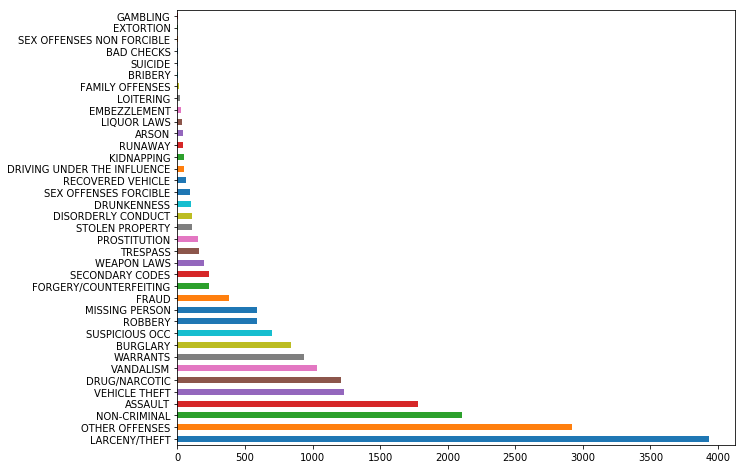

In [18]:
crime_df.Category.value_counts().plot(kind='barh', figsize=(10,8))

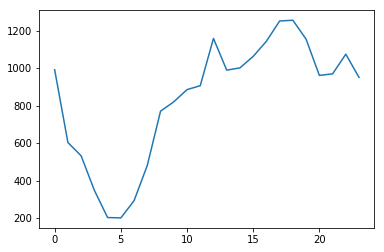

In [34]:
df = pd.read_csv('data_20000.csv')
df.Dates = pd.to_datetime(df.Dates)
df.Dates.apply(lambda x: x.hour).value_counts().sort_index().plot(kind='line')

# Number of cases in hours

### Convert columns which is non-numeric data type to series of words. Each words will be a new column

In [ ]:
my_list = ['Dates','Descript','DayOfWeek','PdDistrict','Resolution','Address','X','Y','Category']

def string_to_series_of_words(x):    
    return pd.Series(x.split(" "))


for f in my_list[1:6]:
    crime_df[f] = crime_df[f].apply(string_to_series_of_words)


### use get_dummies to put dummy variables

In [ ]:
crime_df=pd.get_dummies(crime_df,columns=['Descript','DayOfWeek','PdDistrict','Resolution','Address'],
                  drop_first=False)

crime_df.head()


new_features = list(crime_df.dtypes.index)
new_features.remove('Category')

X = crime_df[new_features]

print(X)

print(new_features)

print("\nTotal features: ", len(new_features))

## Try Various Classifiers

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

decision_tree =  DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
decision_tree.fit(X_train, y_train)

# predict label
prediction = decision_tree.predict(X_test)

# compare to actual label
accuracy = accuracy_score(y_test, prediction)

print("Decision Tree Accuracy: ", accuracy) 

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

random_forest =  RandomForestClassifier(n_estimators = 50, bootstrap = True, random_state=0, criterion='entropy')
random_forest.fit(X_train, y_train)

prediction = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Random Forest Accuracy: ", accuracy) 

### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

decision_tree = DecisionTreeClassifier()

clf = AdaBoostClassifier(n_estimators=100, base_estimator=decision_tree,learning_rate=1)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Ada Boost Accuracy: ", accuracy)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

prediction = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Logistic Regression Accuracy: ", accuracy)

In [ ]:
### Try Cross Validation with Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(logistic_regression, X, y, cv=10, scoring='accuracy')

# accuracy average
accuracy_crossValidation = accuracy_list.mean()

print("Accuracy with cross validation: ", accuracy_crossValidation)

### prediction probabilities

In [ ]:
print("Prediction Probabilities")

print('\n')

y_predict_proba = logistic_regression.predict_proba(X_test)
print(y_predict_proba)

### show Confusion Matrix

In [ ]:
from sklearn import metrics

print("confusion matrix")

print(metrics.classification_report(y_test, prediction))

metrics.confusion_matrix(y_test, prediction)

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print("SVM Accuracy: ", accuracy)

### K - Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)

print("KNN Accuracy: ", accuracy)

### Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=0)

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(8), random_state=0)
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Neural Networks Accuracy: ", accuracy)

### ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

# ANN is an instance of MLPClassifier class
ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', solver='adam', alpha=1e-5, 
                       random_state=1, learning_rate_init = 0.002)


ANN.fit(X_train, y_train)

prediction = ANN.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("ANN Accuracy: ", accuracy)

### Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.06, random_state=1)

In [ ]:
decision_tree =  DecisionTreeClassifier(criterion='entropy')

decision_tree.fit(X_train, y_train)
prediction = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, prediction)

print("Decision Tree Accuracy: ", accuracy, "\n") 